In [1]:
!pip install deap

You should consider upgrading via the 'C:\Users\mlabadm\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import elitism

In [3]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -1.25, 1.25  # boundaries for all dimensions
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5  #0.1   # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
CROWDING_FACTOR = 20.0  # crowding factor for crossover and mutation
PENALTY_VALUE = 10.0    # fixed penalty for violating a constraint
DISTANCE_THRESHOLD = 0.5

In [4]:
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

def simionescu(individual):
    x = individual[0]
    y = individual[1]
    f = 0.1 * x * y
    return f,  # return a tuple

def feasible(individual):
    """Feasibility function for the individual.
    Returns True if feasible, False otherwise.
    """
    x = individual[0]
    y = individual[1]

    # original constraint:
    if x**2 + y**2 > (1 + 0.2 * math.cos(8.0 * math.atan2(x, y)))**2:
        return False

    # previously found solution as an additional constraint:
    elif (x - 0.848)**2 + (y + 0.848)**2 < DISTANCE_THRESHOLD**2:
        return False
        
    else:
        return True

In [5]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)
toolbox.register("evaluate", simionescu)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, PENALTY_VALUE))

In [6]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

In [7]:
print("- Best solutions are:")
for i in range(HALL_OF_FAME_SIZE - 20):
    print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

- Best solutions are:
0 :  -0.07199999837868692  ->  [-0.8484923517621854, 0.8485639054866462]
1 :  -0.07199999837868692  ->  [-0.8484923517621853, 0.8485639054866462]
2 :  -0.07199999837868684  ->  [-0.8484923517621844, 0.8485639054866462]
3 :  -0.07199999837868684  ->  [-0.8484923517621845, 0.8485639054866462]
4 :  -0.07199999837868681  ->  [-0.8484923517621841, 0.8485639054866462]
5 :  -0.07199999837868677  ->  [-0.8484923517621835, 0.8485639054866462]
6 :  -0.07199999837868676  ->  [-0.8484923517621834, 0.8485639054866462]
7 :  -0.07199999837868672  ->  [-0.848492351762183, 0.8485639054866462]
8 :  -0.07199999837868669  ->  [-0.8484923517621823, 0.8485639054866465]
9 :  -0.07199999837868669  ->  [-0.8484923517621826, 0.8485639054866462]


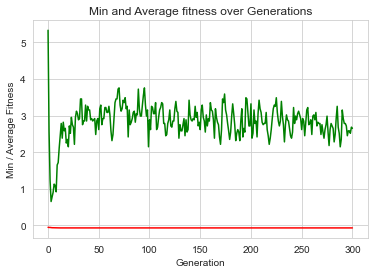

In [8]:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()